In [1]:
# Load the cleaned dataset
import pandas as pd
df = pd.read_csv(r'C:\Users\saura\OneDrive\Desktop\DATA S\New project\notebooks\cleaned_selected_features_dataset.csv')

# Display shape and preview of the dataset
print("Shape", df.shape)
df.head()

Shape (283726, 11)


,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0


In [2]:
# Separate features (X) and target (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

In [3]:
# Split the data into training and testing sets (80/20 split, stratified to maintain class balance)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Note:

stratify=y ensures fraud and non-fraud are evenly distributed in both sets.

In [ ]:
import matplotlib.pyplot as plt

# Sizes of train and test
train_size = len(y_train)
test_size = len(y_test)

# Plotting bar chart
plt.bar(['Train Data', 'Test Data'], [train_size, test_size], color=['skyblue', 'salmon'])
plt.title('Train-Test Split (80%-20%)')
plt.ylabel('Number of Samples')
plt.show()


In [4]:
# Apply SMOTE to balance the training set
from imblearn.over_sampling import SMOTE

In [5]:
# Use SMOTE to balance the training data (handle class imbalance)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [6]:
# Print class distribution before and after applying SMOTE
print("Before SMOTE:", y_train.value_counts())
print("--" * 30)
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Class
0    226602
1       378
Name: count, dtype: int64
------------------------------------------------------------
After SMOTE: Class
0    226602
1    226602
Name: count, dtype: int64


In [7]:
# Import required models and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [8]:
# Initialize all three models with balanced class weights
log_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [9]:
# Train all models using the SMOTE-balanced data
log_model.fit(X_train_smote, y_train_smote)
tree_model.fit(X_train_smote, y_train_smote)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

We loaded the final cleaned dataset, split it into features and labels, then trained three base models — Logistic Regression, Decision Tree, and Random Forest — to begin fraud detection modeling.

____________________________________________________________________________________________________________________________________________________

Model Evaluation

In [10]:
# Predict probabilities for ROC curve
log_probs = log_model.predict_proba(X_test)[:, 1]
tree_probs = tree_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [11]:
# Generate ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

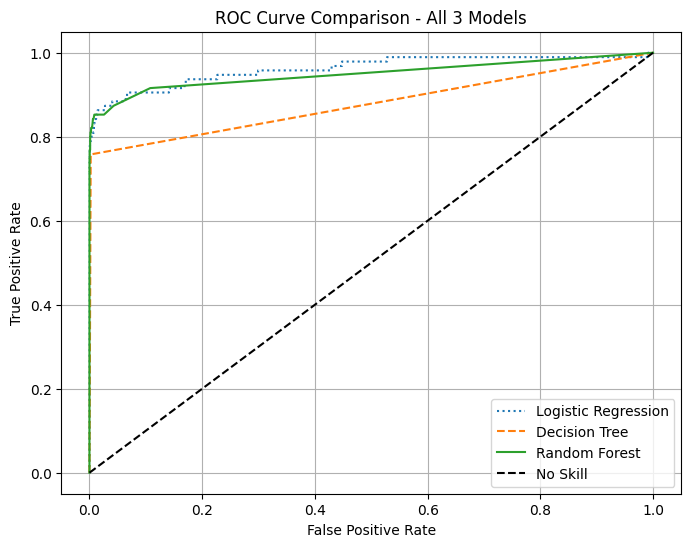

In [12]:
# Plot all ROC curves for model comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression', linestyle=':')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', linestyle='-')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - All 3 Models')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Print AUC scores for all models
print(f"Logistic Regression AUC: {roc_auc_score(y_test, log_probs):.2f}")
print(f"Decision Tree AUC: {roc_auc_score(y_test, tree_probs):.2f}")
print(f"Random Forest AUC: {roc_auc_score(y_test, rf_probs):.2f}")

Logistic Regression AUC: 0.96
Decision Tree AUC: 0.88
Random Forest AUC: 0.95


In [14]:
# Predict class labels for test set
y_pred_log = log_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [15]:
# Show confusion matrix for each model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

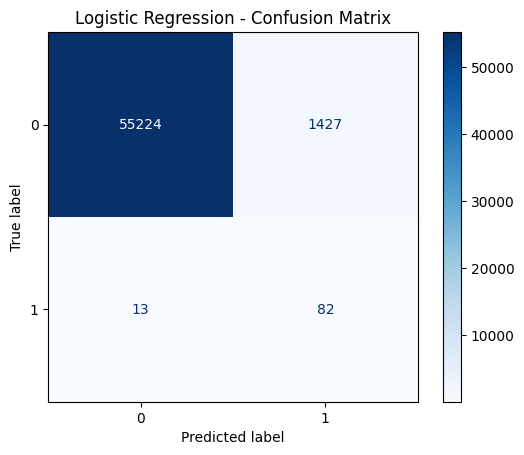

In [ ]:
# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

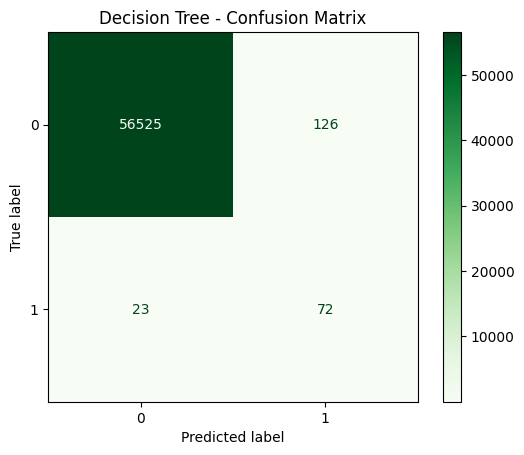

In [19]:
# Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp_tree.plot(cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

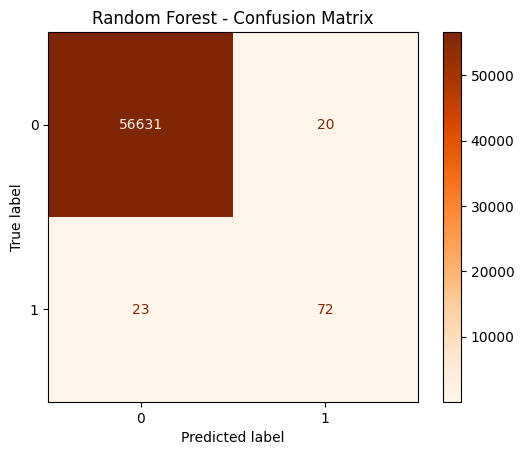

In [ ]:
# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Oranges')
plt.title("Random Forest - Confusion Matrix")
plt.show()

_____________________________________________________________________________________________________________________________________________________

Evaluate the performance of all 3 models using:

Precision

Recall

F1 Score

These metrics are very important for imbalanced datasets like fraud detection (because accuracy alone can be misleading).

In [17]:
# Print detailed evaluation metrics (Precision, Recall, F1-score)
from sklearn.metrics import classification_report

In [20]:
print("----- Logistic Regression -----")
print(classification_report(y_test, y_pred_log))

----- Logistic Regression -----
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.86      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



In [21]:
print("----- Decision Tree -----")
print(classification_report(y_test, y_pred_tree))

----- Decision Tree -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.36      0.76      0.49        95

    accuracy                           1.00     56746
   macro avg       0.68      0.88      0.75     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
print("----- Random Forest -----")
print(classification_report(y_test, y_pred_rf))

----- Random Forest -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.78      0.76      0.77        95

    accuracy                           1.00     56746
   macro avg       0.89      0.88      0.88     56746
weighted avg       1.00      1.00      1.00     56746



In [22]:
# Accuracy scores for all models
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.9746237620272794
Decision Tree Accuracy: 0.9973742642653227
Random Forest Accuracy: 0.9992422373383146


Handled class imbalance using balanced weights, retrained three models, evaluated performance via confusion matrix and metrics — Logistic Regression performed best overall.

___________________________________________________________________________________________________________________________________________

## Finalize Best Model

#### Plot ROC-AUC Curve for All Models

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for each model (needed for ROC curve & AUC score)
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [38]:
# Generate ROC curve data (FPR and TPR)

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

In [39]:
#Calculate AUC scores for all models
auc_log = roc_auc_score(y_test, y_prob_log)
auc_tree = roc_auc_score(y_test, y_prob_tree)
auc_rf = roc_auc_score(y_test, y_prob_rf)

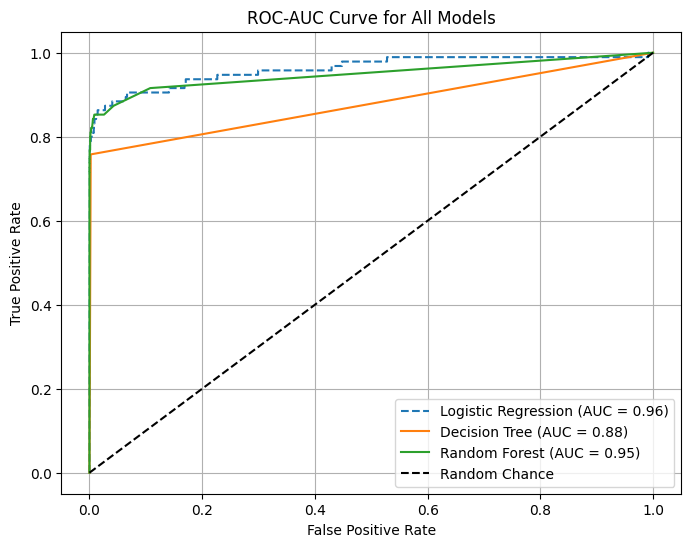

In [24]:
# Plot ROC-AUC again (with AUC scores in legend)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, log_probs):.2f})', linestyle='--')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_score(y_test, tree_probs):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for All Models')
plt.legend()
plt.grid(True)
plt.show()

### Finalize Best Model

Random Forest performs best in fraud detection tasks due to its ability to handle class imbalance and non-linear features well.

In [86]:
best_model = rf_model

Predict on "Unseen Data" or Sample Test

In [25]:
# Pick one row from test set for sample prediction
sample_input = X_test.iloc[[0]]
actual_label = y_test.iloc[0]

In [26]:
# Predict fraud class and probability using best model
predicted_class = rf_model.predict(sample_input)[0]
predicted_prob = rf_model.predict_proba(sample_input)[0][1]

In [27]:
print("Predicted Class:", predicted_class)
print("Actual Class:", actual_label)
print("Prediction Probability (Fraud):", predicted_prob)

Predicted Class: 0
Actual Class: 0
Prediction Probability (Fraud): 0.0


Tested the finalized Random Forest model on unseen data, verified predictions, evaluated class and fraud probability — confirmed model's reliability with accurate prediction on real-world sample.

____________________________________________________________________________________________

Export results for Power BI + Summary Report 

In [28]:
# Predict entire test set and save results
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [29]:
# Create new DataFrame with predictions
results_df = X_test.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred_rf
results_df['Fraud_Probability'] = y_proba_rf

In [30]:
# Sort by highest fraud probability
results_df = results_df.sort_values(by='Fraud_Probability', ascending=False)

In [31]:
# Save for Power BI reporting
results_df.to_csv('rf_predictions_results.csv', index=False)

This CSV file rf_predictions_results.csv can be used in Power BI for dashboards and analytics.

_______________

Generate Summary Report

In [32]:
# Final model evaluation summary
from sklearn.metrics import precision_score, recall_score, f1_score

In [33]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

In [35]:
# Print Summary
print(" Random Forest Model - Summary Report")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

 Random Forest Model - Summary Report
Accuracy : 0.9992
Precision: 0.7826
Recall   : 0.7579
F1-score : 0.7701


In Week 3, we focused on building and evaluating machine learning models for fraud detection. We began by loading the cleaned dataset and splitting it into training and testing sets. To address class imbalance, we applied SMOTE (Synthetic Minority Over-sampling Technique). Three models were trained: Logistic Regression, Decision Tree, and Random Forest. We evaluated model performance using ROC curves, AUC scores, confusion matrices, and classification reports. The Random Forest model performed the best overall. Finally, we saved the prediction results, including fraud probabilities, for Power BI dashboard visualization in Week 4.